## Colab Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
"""
Change directory to where this file is located
"""
# 로컬 경로
%cd './dataset'     
# 구글 드라이브 경로
# %cd '/content/drive/MyDrive/Colab Notebooks/MLDL_HW2/dataset'       

/Users/jspark/workspace/PycharmProjects/pythonProject/MLDL_HW2/dataset


/Users/jspark/workspace/PycharmProjects/pythonProject/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Import Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# You may import other models from scikit-learn.
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


## 1. Diabetes Classification

In [4]:
diabetes = pd.read_csv("diabetes.csv") # load dataset

In [5]:
len(diabetes)

768

In [16]:
diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Question (a)
Train **at least 2** different classification models for the diabetes dataset and briefly explain your choice of models.

Make sure the training and evaluation codes are run in this notebook, and the results should be printed out. e.g., accuracy: 00%

(We will not run the cells to train and evaluate the models if the results are not printed out in your submitted file.)

이진 분류에 적합한 로지스틱 회귀분석, 랜덤포레스트와 성능이 높은 서포트 벡터 머신의 기본 파라미터로 모델을 학습하여 비교
- Logistic Regression : 0.7338
- Random Forest : 0.7403
-  Support Vector Machine : 0.7208

In [210]:
# your code here

# 데이터를 feature와 label로 분리
X = diabetes.drop('Class variable (0 or 1)', axis=1)
y = diabetes['Class variable (0 or 1)']

# 데이터를 train_val set(0.8), evaluation(test) set(0.2)으로 분리
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y, shuffle=True)   

# feature 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_val)
X_test_scaled = scaler.transform(X_test)

# 검토 대상 분류 모델
models = {
    'LogisticRegression':
        { 'model' : LR(max_iter=200),
          'params' : {}
        },
    'RandomForestClassifier':
        { 'model' : RF(),
          'params' : {}
        },
    'SVC':
        { 'model' : SVC(),
          'params' : {}
        }
}


# 각 모델별로 학습 및 accuracy 평가 / 클래스별 정밀도(precision출력)
for model_name in models:
    clf = models[model_name]['model']
    clf.fit(X_train_val, y_train_val)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"[{model_name:25}] accuracy\t\t: {accuracy:.4f}")
    print(f"{report}")
    print(f"--"*30)
    

[LogisticRegression       ] accuracy		: 0.7338
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       100
           1       0.69      0.44      0.54        54

    accuracy                           0.73       154
   macro avg       0.72      0.67      0.68       154
weighted avg       0.73      0.73      0.72       154

------------------------------------------------------------
[RandomForestClassifier   ] accuracy		: 0.7403
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.66      0.54      0.59        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154

------------------------------------------------------------
[SVC                      ] accuracy		: 0.7208
              precision    recall  f1-score   support

           0       0.74     

### Question (b)
In the next cell, report the best model and explain why you chose this model.

In your explanation, include the differences between the models you fitted in (a).

Also, describe how you optimized the final model to get the best performance.

You will get full credit if you plot the process of model optimization.

******* Optimizing RandomForestClassifier  ********
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'max_depth': 30, 'n_estimators': 200, 'random_state': 50}
best score : 0.7703318672530988
RandomForestClassifier Test accuracy: 0.7402597402597403
------------------------------------------------------------

******* Optimizing LogisticRegression  ********
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 1, 'solver': 'liblinear'}
best score : 0.7752499000399841
LogisticRegression Test accuracy: 0.7532467532467533
------------------------------------------------------------



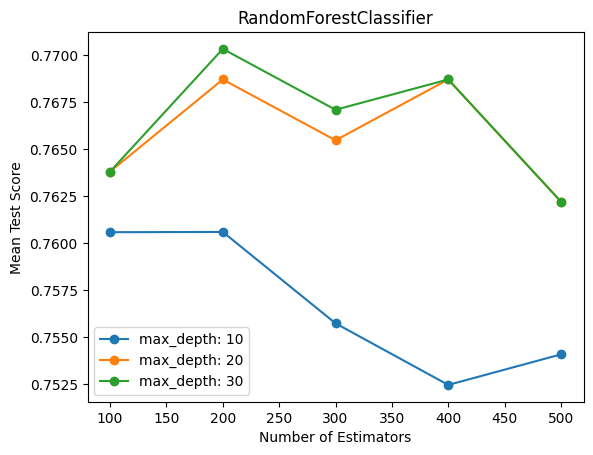

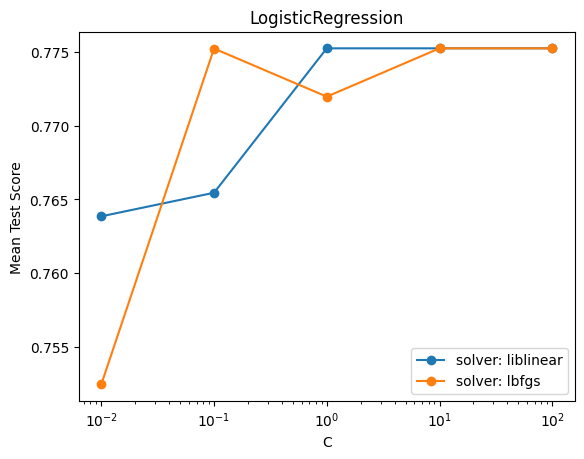

In [209]:
# optimize your model here
# plotting the optimization process is necessary to get full credit.

#k-fold 설정
S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)
# 최적화 대상 모델 파라미터
models = {
    'RandomForestClassifier':
        { 'model' : RF(),
          ## 최적화 대상 하이퍼파라미터
          'params' : {
              'n_estimators': [100, 200, 300, 400, 500],  # 트리의 개수
              #'max_features': ['sqrt', 'log2'],  # 최대 선택할 feature의 수
                'max_depth': [10, 20, 30],      # 트리의 최대 깊이
              # 'min_samples_split': [2, 5, 10],   # 노드 분할을 위한 최소 샘플 수 
              'random_state': [50]
          }
      },
    'LogisticRegression':
        { 'model' : LR(max_iter=200),
          ## 최적화 대상 하이퍼파라미터
          'params' : {
              # 'penalty': ['l2'],
              'C': [0.01, 0.1, 1, 10, 100],  # 규제 강도의 역수
              'solver': ['liblinear', 'lbfgs']  # 최적화 알고리즘
              #'max_iter': [100,200,300],        # 최대 반복 횟수
          }
        }
}

best_models = {}   # 최적화된 모델 저장
cv_results = {}    # 최적화 과정 저장
for model_name in models:
    print(f"******* Optimizing {model_name}  ********")
    model = models[model_name]['model']
    param_grid = models[model_name]['params']
    clf = GridSearchCV(model, param_grid, cv=S_kfold, n_jobs=-1, verbose=1, scoring='accuracy')
    # 표준화된 train set으로 학습
    clf.fit(X_train_scaled, y_train_val)
    
    print(f"Best parameters: {clf.best_params_}")
    print(f"best score : {clf.best_score_}")
    model = clf.best_estimator_
    best_models[model_name] = model
    cv_results[model_name] = clf.cv_results_
    # 표준화된 test set으로 평가
    predictions = model.predict(X_test_scaled)
    print(f"{model_name} Test accuracy: {accuracy_score(y_test, predictions)}")
    print(f"--"*30+"\n")
    

for model_name in best_models:
    # 최적화 과정 plot
    param_grid = models[model_name]['params']
    results = cv_results[model_name]
    mean_test_scores = results['mean_test_score']
    params = results['params']
    
    if model_name == 'RandomForestClassifier':
        for max_depth in param_grid['max_depth']:
            scores = mean_test_scores[np.array([p['max_depth'] for p in params]) == max_depth]
            plt.plot(param_grid['n_estimators'], scores, '-o', label=f'max_depth: {max_depth}')
        plt.xlabel('Number of Estimators')
        plt.ylabel('Mean Test Score')
        plt.title('RandomForestClassifier')
        plt.legend()
        plt.show()
    else: # LogisticRegression
        for solver in param_grid['solver']:
            scores = mean_test_scores[np.array([p['solver'] for p in params]) == solver]
            plt.plot(param_grid['C'], scores, '-o', label=f'solver: {solver}')
        plt.xscale('log')
        plt.xlabel('C')
        plt.ylabel('Mean Test Score')
        plt.title('LogisticRegression')
        plt.legend()
        plt.show()
            
    

- (a)에서(결과 아래) 높은 정확도를 보인 Random Forest와 Logistic Regression 모델을 최적화하여 비교
    - Random Forest : 0.7403 (accuracy)(실행시마다 약간씩 변동)
    - Logistic Regression : 0.7338 (accuracy)
    - Random Forest의 성능이 일반적으로 높으나, diabets의 feature가 고르게 분포되어 있어 Logistic Regression의 성능이 더 높을 수 있음
- (b) 최적화(하이퍼 파라미터 튜닝) 과정 : training set을 표준화하여 학습하고, GridSearchCV를 사용하여 5-fold로 교차검증하여 최대 파라미터를 찾음.
    - RandomForestClassifier : 트리의 개수(n_estimators)와 최대 깊이(max_depth)를 최적화
        - {'max_depth': 30, 'n_estimators': 200} 에서 최적화 모델      
        - 해당 모델의 accuracy : 0.7703
        - 최적화 이전과 비교하여 약 4% 정도의 성능 향상
    - Logistic Regression : 규제 강도의 역수(C)와 최적화 알고리즘(solver)를 최적화
        - {'C': 0.1, 'solver': 'liblinear'} 에서 최적화 모델
        - 해당 모델의 accuracy : 0.7752
        - 최적화 이전과 비교하여 약 5.6% 정도의 성능 향상
- 최종 모델로 비교적 단순하여 적은 데이터에 유리한 Logistic Regression('C':0.1, 'solver':'liblinear')을 선택

## 2. Credit Score Classification

In [6]:
credit_score = pd.read_csv("credit_score.csv")

In [7]:
len(credit_score)

30000

In [8]:
credit_score.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,8,34.0,Musician,30375.050,2426.254167,6.0,5.0,6.0,0.0,No Data,...,Standard,1367.11,35.452909,260.0,No,0.000000,35.244025,High_spent_Medium_value_payments,448.481023,Standard
1,6,47.0,Accountant,16609.095,1488.091250,2.0,3.0,4.0,3.0,"home equity loan,credit-builder loan,student loan",...,Good,864.00,36.989979,277.0,No,22.411006,26.706984,Low_spent_Small_value_payments,305.872096,Good
2,1,17.0,Writer,66289.360,5433.113333,4.0,5.0,15.0,2.0,"personal loan,student loan",...,Standard,713.33,35.810164,189.0,Yes,61.325213,59.890917,High_spent_Medium_value_payments,524.549646,Standard
3,6,40.0,Accountant,72936.680,5800.056667,0.0,2.0,12.0,1.0,student loan,...,Good,827.89,37.082235,381.0,No,51.672175,80.016877,High_spent_Medium_value_payments,698.316615,Good
4,6,39.0,Teacher,31846.760,2703.896667,2.0,4.0,7.0,2.0,"student loan,credit-builder loan",...,Good,881.26,35.267508,190.0,No,27.407887,64.455327,High_spent_Small_value_payments,392.324645,Good


### Question (c)
Train **at least 2** different classification models for the diabetes dataset and briefly explain your choice of models.

Make sure the training and evaluation codes are run in this notebook, and the results should be printed out. e.g., accuracy: 00%

(We will not run the cells to train and evaluate the models if the results are not printed out in your submitted file.)

세개의 클래스(Good, Standard, Poor)를 예측하기 위하여 다중 분류에 적합한 로지스틱 회귀분석, 랜덤포레스트, LDA을 기본 파라미터로 모델을 학습하여 비교
- 비교 과정에서 feature 중 'Type_of_Loan'은 인코딩 시 feature가 너무 많이 확장되며, 또한 실제 값 중 'No Data'가 있어서 해당 feature를 제외하여 학습 추가
- 또한 데이터의 feature가 많아 모델이 복잡해지지 않도록 설정하여 학습

| Model | accuracy(all feature) | accracy(Type_of_loan 제외) |
|-------|-----------------------|--------------------------|
| Logistic Regression  | 0.6930                  | 0.6612                   |
| Random Forest  | 0.7618                  | **0.7702**               |
| Linear Discriminant Analysis  | 0.6602                  | 0.6598                   |

In [18]:
# your code here
# 데이터 분할(feature, target, train, test)
X = credit_score.drop('Credit_Score', axis=1)
y = credit_score['Credit_Score']  # target

## 범주형 데이터(feature)
category_features = X.select_dtypes(include=['object']).columns.tolist()
#print(category_features)
# 수치형 데이터(feature)
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
#print(numeric_features)

# 범주형 원핫 인코딩
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[category_features])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X[category_features].columns))
# 인코딩 데이터와 기존 데이터 결합
X = X.drop(category_features, axis=1)
X_encoded_concat = pd.concat([X, X_encoded_df], axis=1)

# 타겟 라벨 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded_concat, y_encoded, test_size=0.2, random_state=50, stratify=y, shuffle=True)

# 수치형 데이터 스케일링
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# feature 중 'Type_of_Loan'은 인코딩 시 feature가 너무 많이 확장되며, 
# 또한 실제 값 중 'No Data'가 있어서 해당 feature를 제외하여 학습 추가
X_train_wo_loan = X_train.copy()
X_test_wo_loan = X_test.copy()
loan_col = [col for col in X_train.columns if 'Type_of_Loan' in col]
X_train_wo_loan = X_train_wo_loan.drop(loan_col, axis=1)
X_test_wo_loan = X_test_wo_loan.drop(loan_col, axis=1)

print(f'X_train_columns size: {len(X_train.columns)}')
print(f'X_train_wo_loan_columns size: {len(X_train_wo_loan.columns)}')

# 검토 대상 분류 모델
models = {
    'LogisticRegression':
        { 'model' : LR(penalty='l1', solver='liblinear'),
          },
    'RandomForestClassifier':
        { 'model' : RF(),
          },
    'LinearDiscriminantAnalysis':
        { 'model' : LDA(solver='lsqr',shrinkage='auto'),
          },
}


# 각 모델별로 학습 및 accuracy 평가 / 클래스별 정밀도(precision출력)
for model_name in models:
    clf = models[model_name]['model']
    # feature 모두 사용 학습
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"[{model_name:25}]\n\t 1) All feature Accuracy\t\t: {accuracy:.4f}")
    print(f"{report}")
    # feature 중 'Type_of_Loan'은 제외하여 학습
    clf.fit(X_train_wo_loan, y_train)
    y_pred = clf.predict(X_test_wo_loan)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"\t 2) feature(w/o loan) Accuracy\t\t: {accuracy:.4f}")
    print(f"{report}")
    print(f"--"*40)


X_train_columns size: 5986
X_train_wo_loan_columns size: 45
[LogisticRegression       ]
	 1) All feature Accuracy		: 0.6930
              precision    recall  f1-score   support

           0       0.56      0.72      0.63      1088
           1       0.70      0.63      0.66      1744
           2       0.75      0.72      0.74      3168

    accuracy                           0.69      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.70      0.69      0.69      6000

	 2) feature(w/o loan) Accuracy		: 0.6612
              precision    recall  f1-score   support

           0       0.53      0.72      0.61      1088
           1       0.67      0.56      0.61      1744
           2       0.73      0.70      0.71      3168

    accuracy                           0.66      6000
   macro avg       0.64      0.66      0.64      6000
weighted avg       0.67      0.66      0.66      6000

------------------------------------------------------------------------

### Question (d)
In the next cell, report the best model and explain why you chose this model.

In your explanation, include the differences between the models you fitted in (a).

Also, describe how you optimized the final model to get the best performance.

You will get full credit if you plot the process of model optimization.

******* Optimizing RandomForestClassifier  ********
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'max_depth': 40, 'n_estimators': 500, 'random_state': 50}
best score : 0.75325
RandomForestClassifier Test accuracy: 0.775
------------------------------------------------------------



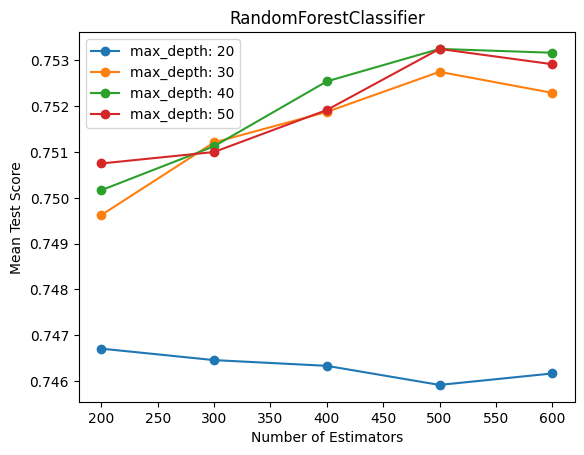

In [21]:
# optimize your model here
# plotting the optimization process is necessary to get full credit.

# (c)애서 Random Forest가 가장 높은 성능을 보였으므로 최적화
# 데이터는 type_of_loan feature를 제외한 데이터로 학습
models = {
    'RandomForestClassifier':
        { 'model' : RF(),
          ## 최적화 대상 하이퍼파라미터
          'params' : {
              'n_estimators': [200, 300, 400, 500, 600],  # 트리의 개수
              #'max_features': ['sqrt', 'log2'],  # 최대 선택할 feature의 수
              'max_depth': [20, 30, 40, 50],      # 트리의 최대 깊이
              # 'min_samples_split': [2, 5, 10],   # 노드 분할을 위한 최소 샘플 수 
              'random_state': [50]
          }
      }
}
#k-fold 설정(학습시간 단축을 위해 3-fold)
S_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=50)

best_models = {}   # 최적화된 모델 저장
cv_results = {}    # 최적화 과정 저장
for model_name in models:
    print(f"******* Optimizing {model_name}  ********")
    model = models[model_name]['model']
    param_grid = models[model_name]['params']
    clf = GridSearchCV(model, param_grid, cv=S_kfold, n_jobs=-1, verbose=1, scoring='accuracy')
    # feature 중 'Type_of_Loan'은 제외하여 학습
    clf.fit(X_train_wo_loan, y_train)
    print(f"Best parameters: {clf.best_params_}")
    print(f"best score : {clf.best_score_}")
    model = clf.best_estimator_
    best_models[model_name] = model
    cv_results[model_name] = clf.cv_results_
    predictions = model.predict(X_test_wo_loan)
    print(f"{model_name} Test accuracy: {accuracy_score(y_test, predictions)}")
    print(f"--"*30+"\n")

# 최적화 과정 plot
for model_name in best_models:
    param_grid = models[model_name]['params']
    results = cv_results[model_name]
    mean_test_scores = results['mean_test_score']
    params = results['params']

    # Random Forest 만 최적화 진행
    if model_name == 'RandomForestClassifier':
        for max_depth in param_grid['max_depth']:
            scores = mean_test_scores[np.array([p['max_depth'] for p in params]) == max_depth]
            plt.plot(param_grid['n_estimators'], scores, '-o', label=f'max_depth: {max_depth}')
        plt.xlabel('Number of Estimators')
        plt.ylabel('Mean Test Score')
        plt.title('RandomForestClassifier')
        plt.legend()
        plt.show()


1. (c) 에서 가장 높은 accuracy를 보여준 Random Forest 모델과 type_of_loan을 제외한 feature로 학습

| Model | accuracy(all feature) | accracy(Type_of_loan 제외) |
|-------|-----------------------|--------------------------|
| Logistic Regression  | 0.6930                  | 0.6612                   |
| Random Forest  | 0.7618                  | **0.7702**               |
| Linear Discriminant Analysis  | 0.6602                  | 0.6598                   |

2. GridSearchCV를 이용하여 3-fold로 교차검증하여 최대 accuracy를 보여주는 하이퍼파라미터를 검색
    - 트리의 개수(n_estimators)와 최대 깊이(max_depth)를 수정하며 반복하여 최적화 파라미터를 검색
        - 트리 개수와 깊이가 높을 수록 성능이 올라가 수치를 더 늘려가며 성능이 떨어지는 지점을 찾음        
    - 최대 성능(accuracy) : 0.775
        - n_estimators : 500
        - max_depth : 40
    - (c)(0.7702) 와 비교하여 약 0.6% 정도의 성능 향상
3. 최종 모델로 Random Forest('n_estimators':500, 'max_depth':40)을 선택

### Question (e)
In the next cell, examine the differences between the two datasets with respect to the reasoning behind your choice of the the best model for each dataset.

1. 두 데이터셋은 분류(classification) 문제이나 다음과 같은 차이점이 있음
    - Diabetes : 이진 분류(Binary Classification, 2개 클래스)
        - feature가 적고(8개) 데이터가 상대적으로 작음(768개)
        - feature가 모두 수치형으로 데이터가 고르게 분포되어 있음
    - credit_score : 다중 분류(Multi-class Classification, 3개 클래스)
        - feature가 많고(23개) 데이터가 많음(30000개)
        - feature 중 범주형 데이터가 많아 인코딩 시 feature가 확장됨
2. 모델 선택 이유
    - Diabetes : Logistic Regression
        - 이진 분류이고 feature 수치형으로 고르게 분포되어 있어 Logistic Regression에 적합
        - 상대적으로 단순한 모델로 작은 데이터셋에서 과적합 위험이 적음
    - credit_score : Random Forest
        - feature가 많고 데이터가 많아 복잡한 모델에서도 성능이 좋은 Random Forest 선택
        - 배깅과정을 통해 여러 트리를 평균하여 특정 데이터에 과적합되는것을 방지
        - 범주형 및 수치형 데이터를 모두 처리 가능(위에서는 범주형 데이터를 인코딩 하여 학습함)